# Stock-Market Sentiment Analysis

* Stock news from Multiple twitter Handles regarding Economic news dividing into two parts Negative(-1) and positive(1)

* Negative count: 2,106
* Positive count: 3,685

## Exploratory Data Analysis

* Distinct word frequency count by sentiment

## Model Training

* Multinomial Naive Bayes
* Support Vector Machine
* Random Forest

## Deep Neural Network

* Binary Classifier with keras

In [1]:
# Imported Packages

import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from IPython.display import clear_output
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from nltk.stem import WordNetLemmatizer 
import nltk
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

## Positive-Negative Stock Sentiment Data

In [16]:
data= pd.read_csv("stock_data.csv")
data.head(10)

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1
5,PGNX Over 3.04,1
6,AAP - user if so then the current downtrend wi...,-1
7,Monday's relative weakness. NYX WIN TIE TAP IC...,-1
8,GOOG - ower trend line channel test & volume s...,1
9,AAP will watch tomorrow for ONG entry.,1


## Exploratory Data Analysis

In [3]:
# Function to plot distinct words by sentiment

def plotTopDistinctWords(sentiment,numOfWords):
    
    lemmatizer = WordNetLemmatizer() 
    frequencies=[]
    negative_sentiment=lemmatizer.lemmatize("".join(list(data[data['Sentiment']==-1]['Text'])).lower()).replace('&', '')
    positive_sentiment=lemmatizer.lemmatize("".join(list(data[data['Sentiment']==1]['Text'])).lower()).replace('&', '')
    
    top_words_positive=np.setdiff1d([i[0] for i in Counter(positive_sentiment.split()).most_common(numOfWords)],[i[0] for i in Counter(negative_sentiment.split()).most_common(numOfWords)])
    
    top_words_negative=np.setdiff1d([i[0] for i in Counter(negative_sentiment.split()).most_common(numOfWords)],[i[0] for i in Counter(positive_sentiment.split()).most_common(numOfWords)])
    
    if sentiment==-1:
        for i in range(len(Counter(negative_sentiment.split()).most_common(numOfWords))):
            if Counter(negative_sentiment.split()).most_common(numOfWords)[i][0] in top_words_negative:
                frequencies.append(Counter(negative_sentiment.split()).most_common(numOfWords)[i])
    
    else:
        for i in range(len(Counter(positive_sentiment.split()).most_common(numOfWords))):
            if Counter(positive_sentiment.split()).most_common(numOfWords)[i][0] in top_words_positive:
                frequencies.append(Counter(positive_sentiment.split()).most_common(numOfWords)[i])

                
                
    figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
    

    plt.bar(*zip(*frequencies))
    
    if sentiment==-1:
        plt.title("Top Distinct Words for Negative Stock Sentiment",fontsize=20)
    else:
        plt.title("Top Distinct Words for Positive Stock Sentiment",fontsize=20)
        

    plt.show()
        
    
    
    
    

In [4]:
def mean(list):
    return sum(list)/len(list)

### Data Visualization: Distinct Word Frequency for Negative Sentiment

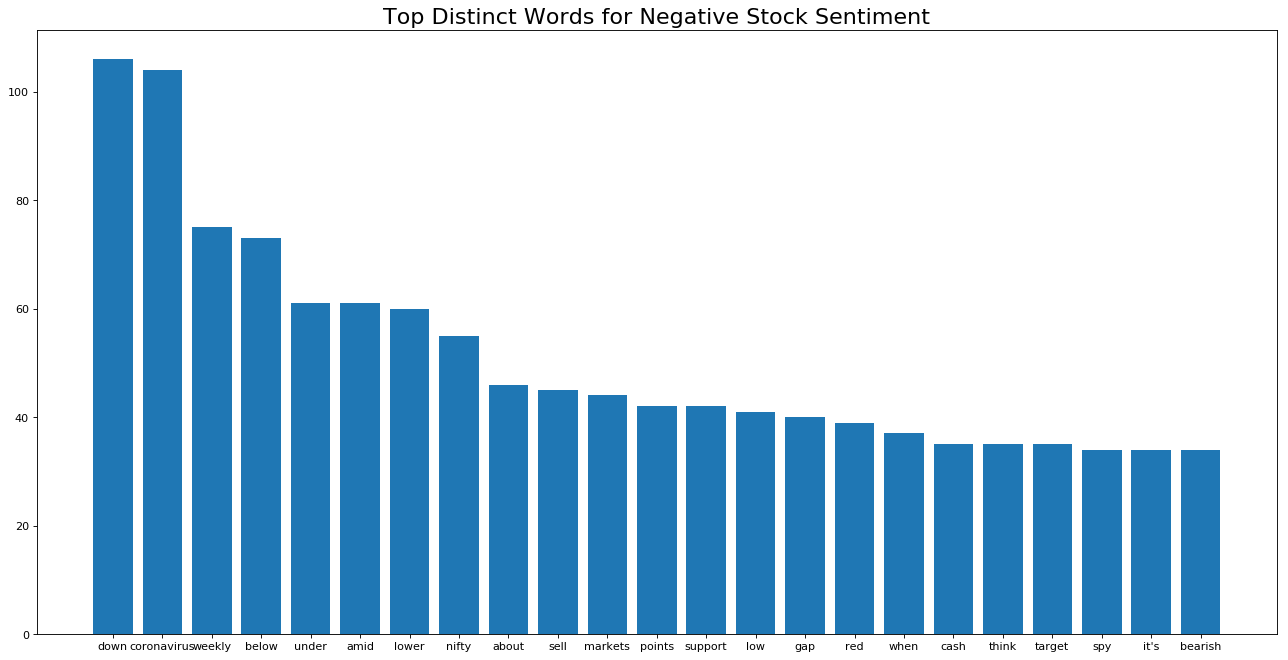

In [12]:
plotTopDistinctWords(-1,100)

### Data Visualization: Distinct Word Frequency for Positive Sentiment

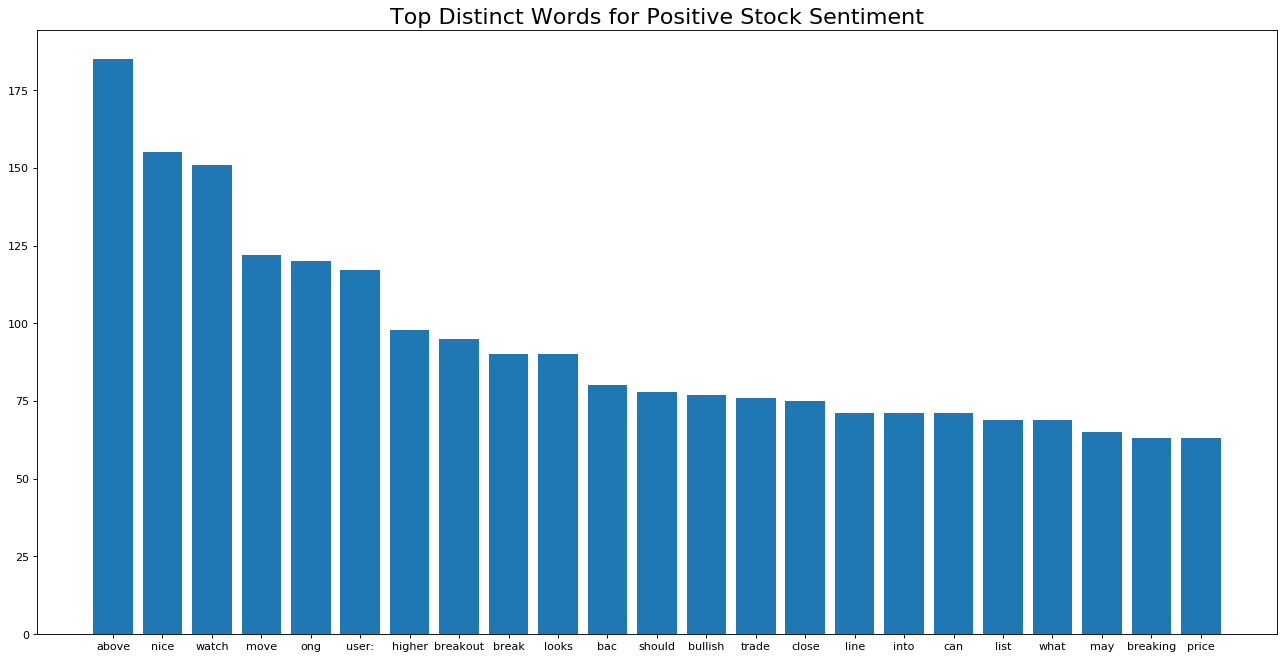

In [13]:
plotTopDistinctWords(1,100)

## Preprocessing Data, Training Machine Learning Classifier, & Evaluating Classifier

### Preprocessing:
* Count Vectorization
* TF-ID Vectorization

### Machine Learning Models:
* Multinomial Naive Bayes
* Support Vector Machine
* Random Forests


### Evaluation:
* Accuracy Measure
* K-Fold Cross Validation
* Confusion Matrix
* ROC Curve

In [5]:
def k_fold_crossValidation(text_preprocessing,k):
    
    kf=KFold(n_splits=k)
    
    y = data.Sentiment
    X=data["Text"]
    
    for i in range(len(y)):
        if y[i]==-1:
            y[i]=0
    
    count=1
            
    for train,test in kf.split(X):
        print(count)
        X_train,X_test,y_train,y_test=X.iloc[train],X.iloc[test],y.iloc[train],y.iloc[test]
    
        
        if text_preprocessing=="count":
            
            count_vectorizer = CountVectorizer(stop_words="english")
            X_train = count_vectorizer.fit_transform(X_train)
            X_test = count_vectorizer.transform(X_test)
        
        elif text_preprocessing=="tf-id":
            
            tfidf_vectorizer = TfidfVectorizer(stop_words="english",max_df=0.7)
            X_train = tfidf_vectorizer.fit_transform(X_train)
            X_test = tfidf_vectorizer.transform(X_test)

        
        # Multinomial Naive Bayes Classifier
        nb_classifier = MultinomialNB()
        nb_classifier.fit(X_train, y_train)
        nb_pred = nb_classifier.predict(X_test)
        
        if count%5==0:
            disp = plot_precision_recall_curve(nb_classifier, X_test, y_test)
            disp.ax_.set_title('Precision-Recall curve: Naive Bayes')
        
        # Random Forest Classifier
        randomForest = RandomForestClassifier()
        randomForest.fit(X_train, y_train)
        rf_pred=randomForest.predict(X_test)
        
        if count%5==0:
            disp = plot_precision_recall_curve(randomForest, X_test, y_test)
            disp.ax_.set_title('Precision-Recall curve: Random Forest')
        
        # Support Vector Classifier
        svc=SVC(kernel='linear')
        svc.fit(X_train, y_train)
        svc_pred=svc.predict(X_test)
        
        if count%5==0:
            disp = plot_precision_recall_curve(svc, X_test, y_test)
            disp.ax_.set_title('Precision-Recall curve: Support Vector')
        
     
        NaiveBayes_scores.append(metrics.accuracy_score(y_test, nb_pred))
        RandomForest_scores.append(metrics.accuracy_score(y_test, rf_pred))
        SVC_scores.append(metrics.accuracy_score(y_test, svc_pred))
        
        NaiveBayes_cm.append(metrics.confusion_matrix(y_test, nb_pred))
        RandomForest_cm.append(metrics.confusion_matrix(y_test, rf_pred))
        SVC_cm.append(metrics.confusion_matrix(y_test, svc_pred))
        
        count=count+1
    clear_output()
        
     
    
def heatmap(confustion_matrix):

    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    confustion_matrix.flatten()]

    group_percentages = ["{0:.2%}".format(value) for value in
                         confustion_matrix.flatten()/np.sum(confustion_matrix)]

    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]

    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(confustion_matrix, annot=labels, fmt='', cmap='Blues')

## Count Vectorization Model Training

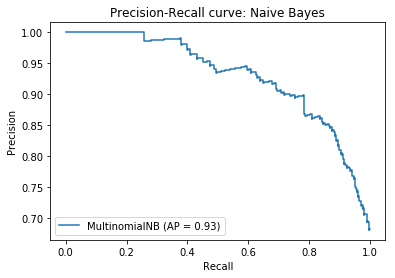

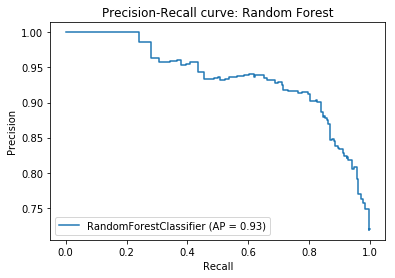

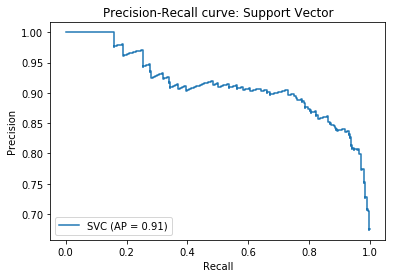

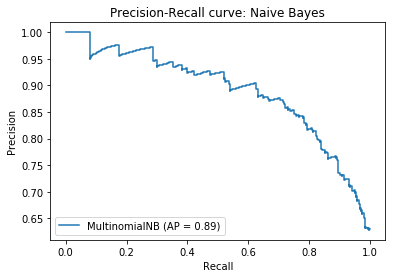

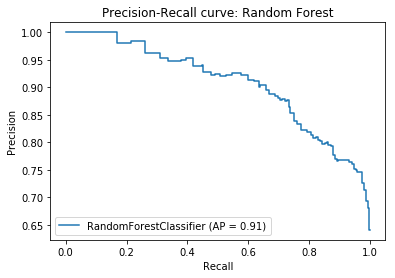

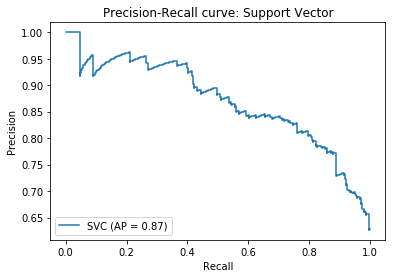

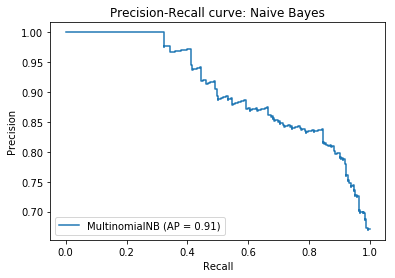

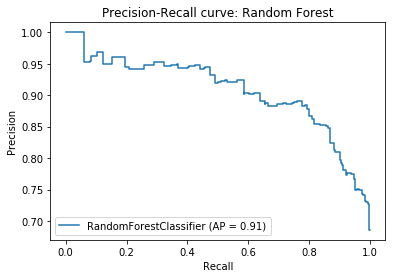

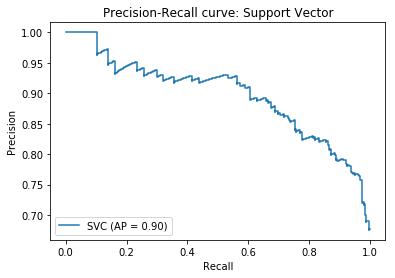

In [56]:
NaiveBayes_scores=[]
SVC_scores=[]
RandomForest_scores=[]
DeepNetwork_scores=[]

NaiveBayes_cm=[]
SVC_cm=[]
RandomForest_cm=[]
DeepNetwork_cm=[]

data=data.sample(frac=1).reset_index(drop=True)
k_fold_crossValidation("count",15)


## Model Evaluation: Multinomial Naive Bayes (Count Vectorization)

Naive Bayes Score (Count Vector): 0.7667126338291539


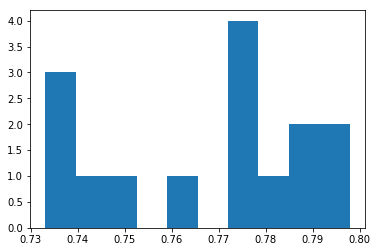

In [16]:
print("Naive Bayes Score(Count Vector): {}".format(mean(NaiveBayes_scores)))
plt.hist(NaiveBayes_scores)
plt.show()

## Confusion Matrix Heatmap: Multinomial Naive Bayes (Count Vectorization)

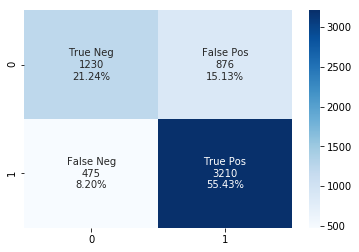

In [20]:
heatmap(sum(NaiveBayes_cm))

## Model Evaluation: Support Vector Classifier (Count Vectorization)

Support Vector Score (Count Vector): 0.7762023983255457


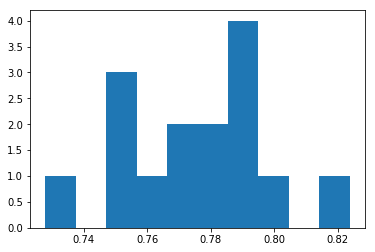

In [21]:
print("Support Vector Score (Count Vector): {}".format(mean(SVC_scores)))
plt.hist(SVC_scores)
plt.show()


## Confusion Matrix Heatmap: Support Vector Classifier (Count Vectorization)

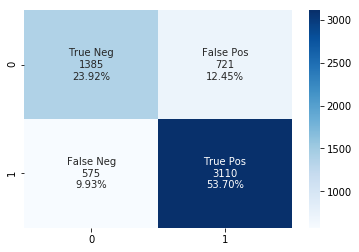

In [22]:
heatmap(sum(SVC_cm))

## Model Evaluation: Random Forest Classifier (Count Vectorization)

Random Forest Score (Count Vector): 0.7874264190687855


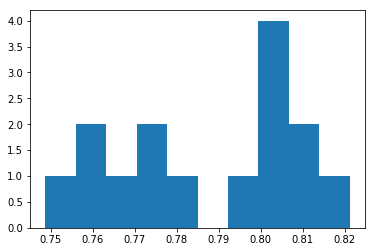

In [23]:
print("Random Forest Score (Count Vector): {}".format(mean(RandomForest_scores)))
plt.hist(RandomForest_scores)
plt.show()


## Confusion Matrix Heatmap: Random Forest Classifier (Count Vectorization)

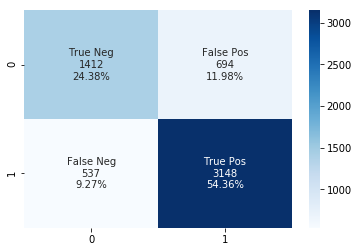

In [24]:
heatmap(sum(RandomForest_cm))

## TF-idf Vectorization Model Training

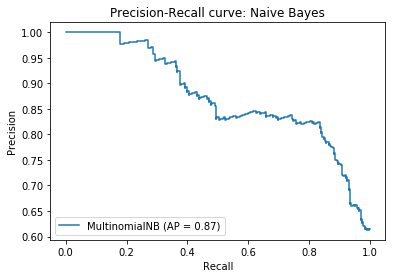

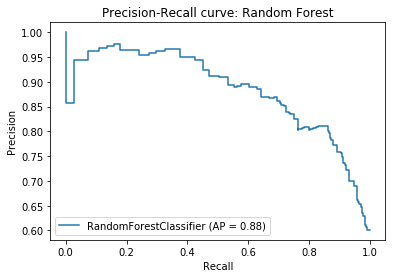

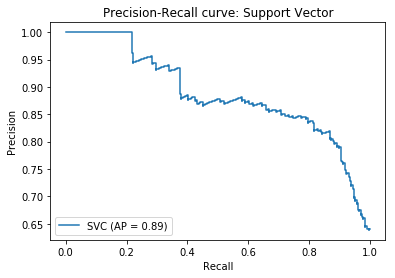

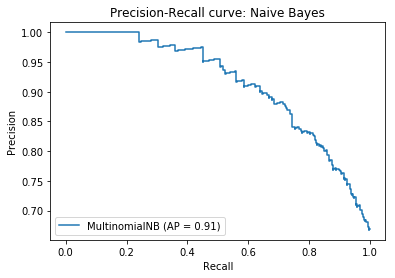

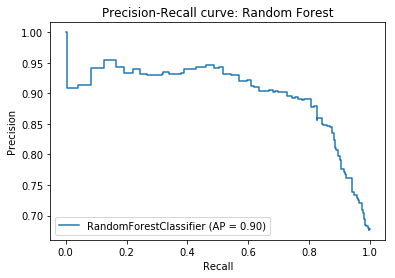

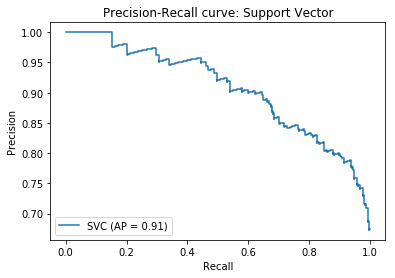

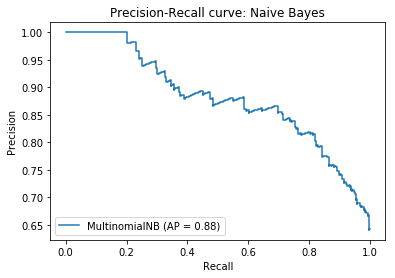

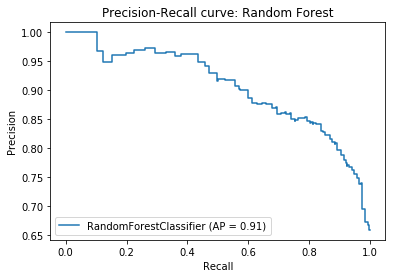

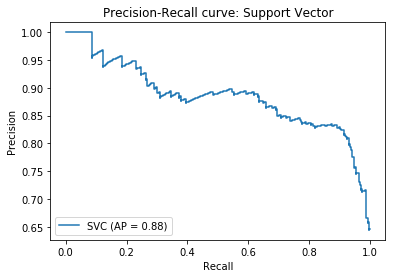

In [57]:
NaiveBayes_scores=[]
SVC_scores=[]
RandomForest_scores=[]
DeepNetwork_scores=[]

NaiveBayes_cm=[]
SVC_cm=[]
RandomForest_cm=[]
DeepNetwork_cm=[]

data=data.sample(frac=1).reset_index(drop=True)
k_fold_crossValidation("tf-id",15)


## Model Evaluation: Multinomial Naive Bayes (TF-idf Vectorization)

Naive Bayes Score (TF-id Vector): 0.7307953211676552


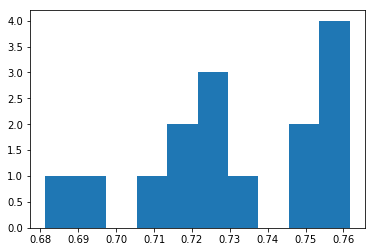

In [58]:
print("Naive Bayes Score (TF-id Vector): {}".format(mean(NaiveBayes_scores)))
plt.hist(NaiveBayes_scores)
plt.show()

## Confusion Matrix Heatmap: Multinomial Naive Bayes (TF-idf Vectorization)

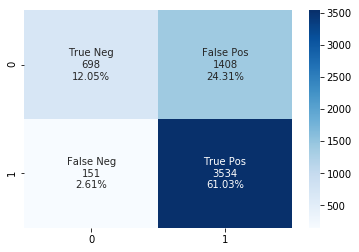

In [63]:
heatmap(sum(NaiveBayes_cm))

## Model Evaluation: Support Vector Classifier (TF-idf Vectorization)

Support Vector Score (TF-id Vector): 0.7955443092206557


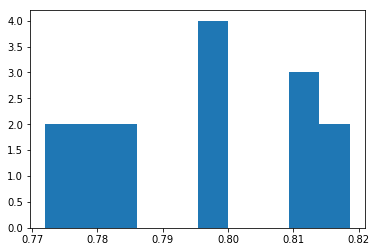

In [59]:
print("Support Vector Score (TF-id Vector): {}".format(mean(SVC_scores)))
plt.hist(SVC_scores)
plt.show()

## Confusion Matrix Heatmap: Support Vector Classifier (TF-idf Vectorization)

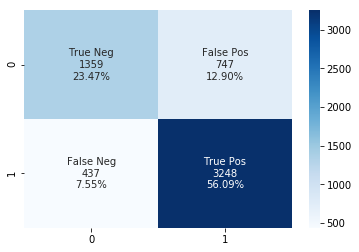

In [62]:
heatmap(sum(SVC_cm))

## Model Evaluation: Random Forest Classifier (TF-idf Vectorization)

Random Forest Score (TF-id Vector): 0.7893302629053923


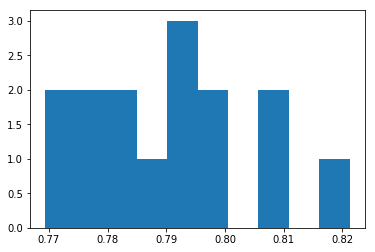

In [60]:
print("Random Forest Score (TF-id Vector): {}".format(mean(RandomForest_scores)))
plt.hist(RandomForest_scores)
plt.show()

## Confusion Matrix Heatmap: Random Forest Classifier (TF-idf Vectorization)

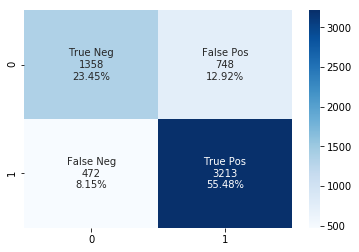

In [61]:
heatmap(sum(RandomForest_cm))

## Training Deep Neural Network Classifier

In [10]:
deepNetwork_scores=[]
deepNetwork_cm=[]

def deepNeuralNetwork(text_preprocessing,k):
    
    kf=KFold(n_splits=k)
    
    y = data.Sentiment
    X=data["Text"]
    
    for i in range(len(y)):
        if y[i]==-1:
            y[i]=0
    
    count=1
            
    for train,test in kf.split(X):
        print("Fold No.{}".format(count))
        X_train,X_test,y_train,y_test=X.iloc[train],X.iloc[test],y.iloc[train],y.iloc[test]
    
        
        if text_preprocessing=="count":
            
            count_vectorizer = CountVectorizer(stop_words="english")
            X_train = pd.DataFrame(count_vectorizer.fit_transform(X_train).toarray())
            X_test = pd.DataFrame(count_vectorizer.transform(X_test).toarray())
            

        
        elif text_preprocessing=="tf-id":
            
            tfidf_vectorizer = TfidfVectorizer(stop_words="english",max_df=0.7)
            X_train = pd.DataFrame(tfidf_vectorizer.fit_transform(X_train).toarray())
            X_test = pd.DataFrame(tfidf_vectorizer.transform(X_test).toarray())

        
        
        
        model=Sequential()
        
  
        model.add(Dense(500,input_shape=X_train.shape[1:],activation="relu"))
        model.add(Dense(100,activation="relu"))
        model.add(Dense(100,activation="relu"))
        model.add(Dense(10,activation="relu"))
        model.add(Dense(1, activation='sigmoid'))
        
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
        history=model.fit(X_train,y_train,epochs=3,verbose=1)
        clear_output(wait=True) 
    

        pred=model.predict(X_test)
        pred=(pred>0.5)
        
        deepNetwork_scores.append(metrics.accuracy_score(y_test, pred))
        
        deepNetwork_cm.append(metrics.confusion_matrix(y_test, pred))
        
        
        
        count=count+1

deepNeuralNetwork("count",15)

Fold No.15
Epoch 1/3
169/169 [==============================] - 4s 22ms/step - loss: 0.5305 - accuracy: 0.7325
Epoch 2/3
169/169 [==============================] - 3s 20ms/step - loss: 0.1886 - accuracy: 0.9269
Epoch 3/3
169/169 [==============================] - 3s 20ms/step - loss: 0.0391 - accuracy: 0.9876


## Model Evaluation: Deep Neural Network (Count Vectorization)

Deep Neural Network Score (Count Vector): 0.7561691948606035


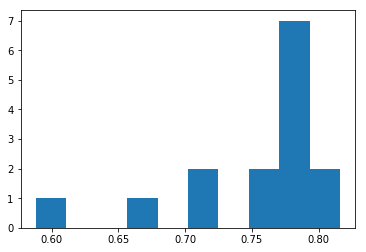

In [11]:
print("Deep Neural Network Score (Count Vector): {}".format(mean(deepNetwork_scores)))

plt.hist(deepNetwork_scores)
plt.show()


## Confusion Matrix Heatmap: Deep Neural Network (Count Vectorization)

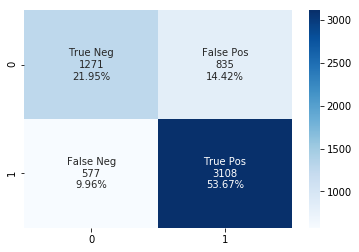

In [12]:
heatmap(sum(deepNetwork_cm))

In [13]:
deepNetwork_scores=[]
deepNetwork_cm=[]

deepNeuralNetwork("tf-id",15)

Fold No.15
Epoch 1/3
169/169 [==============================] - 4s 26ms/step - loss: 0.5375 - accuracy: 0.7232
Epoch 2/3
169/169 [==============================] - 5s 28ms/step - loss: 0.2004 - accuracy: 0.9240
Epoch 3/3
169/169 [==============================] - 5s 27ms/step - loss: 0.0443 - accuracy: 0.9837


## Model Evaluation: Deep Neural Network (TF-idf Vectorization)

Deep Neural Network Score (TF-id Vector): 0.7402752674351664


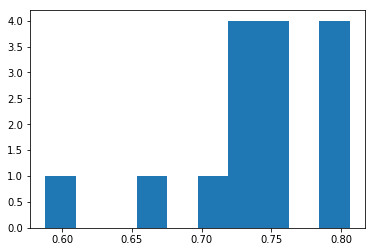

In [14]:
print("Deep Neural Network Score (TF-id Vector): {}".format(mean(deepNetwork_scores)))

plt.hist(deepNetwork_scores)
plt.show()

## Confusion Matrix Heatmap: Deep Neural Network (TF-idf Vectorization)

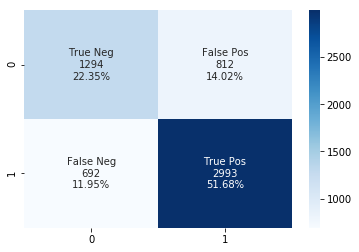

In [15]:
heatmap(sum(deepNetwork_cm))

# Conclusions:

## Count Vectorization

#### Multinomial Naive Bayes
- Accuracy: 0.7667

#### Support Vector Classifier
- Accuracy: 0.7762

#### Random Forests
- Accuracy: 0.7874

#### Deep Neural Network
- Accuracy: 0.756


## TF-idf Vectorization

#### Multinomial Naive Bayes
- Accuracy: 0.7307

#### Support Vector Classifier
- Accuracy: 0.7955

#### Random Forests
- Accuracy: 0.78933

#### Deep Neural Network
- Accuracy: 0.7402



# Best Model:

* **Support Vector Classifier with TF-idf Vectorized Input Data**
